In [42]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('mushroom.csv')

In [3]:
data.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [4]:
data.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [5]:
print(data.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


Text(0.5, 1.0, 'Distribution of Stalk Height')

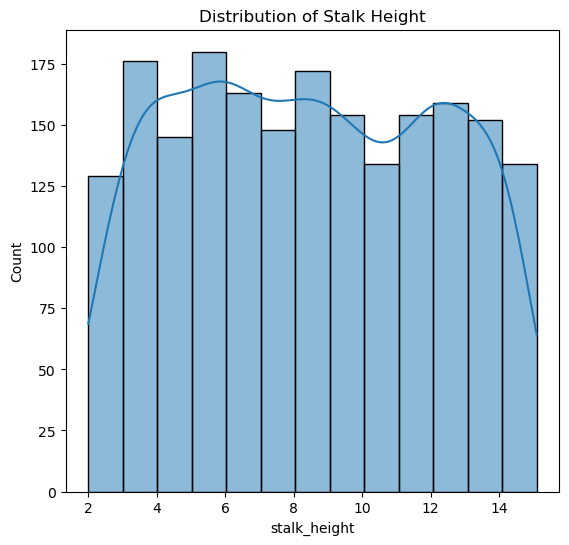

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['stalk_height'], kde=True)
plt.title('Distribution of Stalk Height')

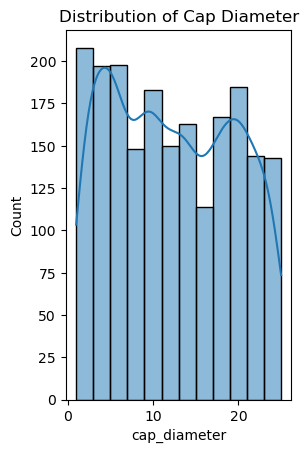

In [7]:
plt.subplot(1, 2, 2)
sns.histplot(data['cap_diameter'], kde=True)
plt.title('Distribution of Cap Diameter')

plt.show()

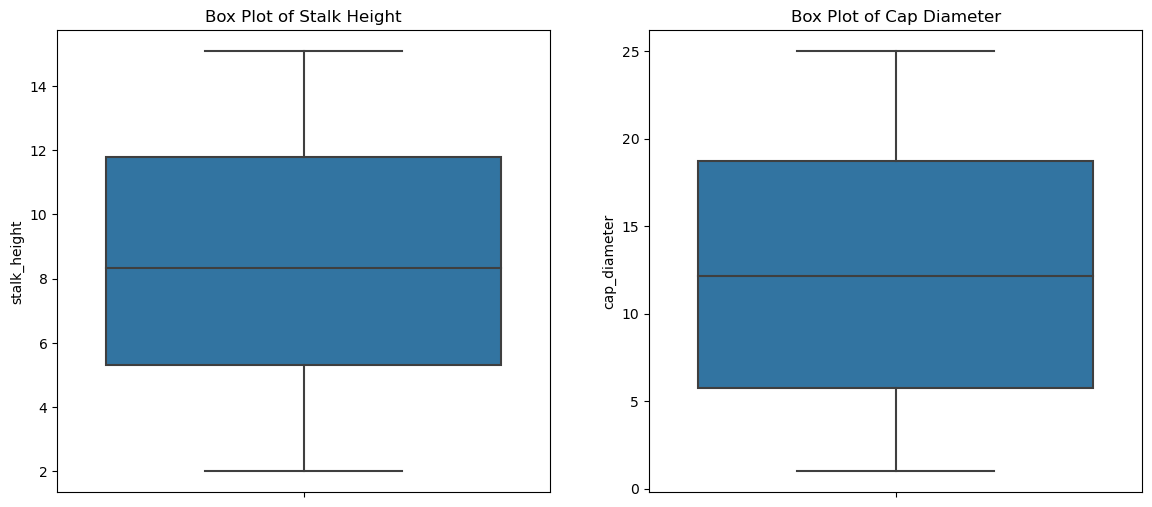

In [8]:
# Box plots for numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['stalk_height'])
plt.title('Box Plot of Stalk Height')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['cap_diameter'])
plt.title('Box Plot of Cap Diameter')

plt.show()

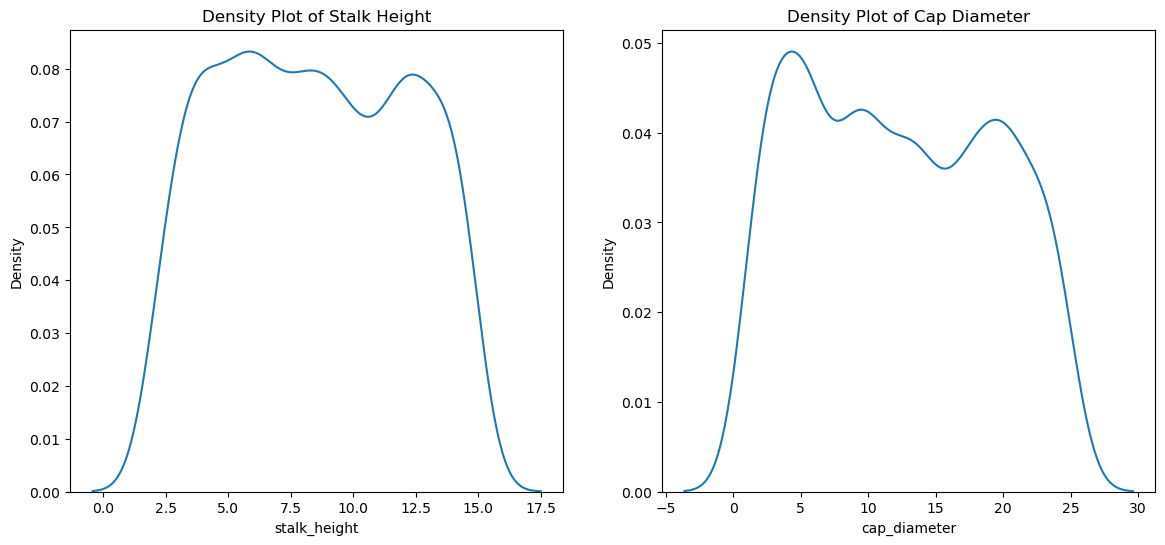

In [9]:
# Density plots for numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data['stalk_height'])
plt.title('Density Plot of Stalk Height')

plt.subplot(1, 2, 2)
sns.kdeplot(data['cap_diameter'])
plt.title('Density Plot of Cap Diameter')

plt.show()

In [10]:
# Calculate the correlation matrix
correlation_matrix = data[['stalk_height', 'cap_diameter']].corr()

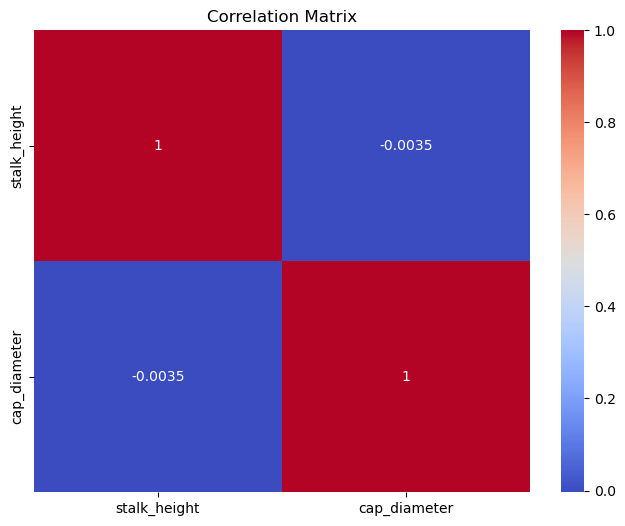

In [11]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [14]:
# Perform one-hot encoding on categorical columns
mushroom_df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(mushroom_df_encoded.head())

   Unnamed: 0  stalk_height  cap_diameter  cap_shape_bell  cap_shape_conical  \
0        1167     14.276173      5.054983               0                  0   
1        1037      3.952715     19.068319               0                  0   
2         309      9.054265      7.205884               0                  0   
3         282      5.226499     20.932692               1                  0   
4         820     14.037532     12.545245               0                  0   

   cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_fibrous  \
0                 0               0                 1                    0   
1                 0               0                 1                    1   
2                 0               1                 0                    0   
3                 0               0                 0                    0   
4                 0               1                 0                    0   

   cap_surface_grooves  ...  population_solitary  

In [19]:
# Perform one-hot encoding correctly
categorical_columns = data.select_dtypes(include=['object']).columns

# Make sure 'class' is included in encoding
if 'class' in categorical_columns:
    categorical_columns = categorical_columns.drop('class')

mushroom_df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Check the columns again
print(mushroom_df_encoded.columns)

Index(['Unnamed: 0', 'class', 'stalk_height', 'cap_diameter', 'cap_shape_bell',
       'cap_shape_conical', 'cap_shape_convex', 'cap_shape_flat',
       'cap_shape_sunken', 'cap_surface_fibrous',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=128)


In [20]:
# Ensure 'class' is in the DataFrame
if 'class' in mushroom_df_encoded.columns:
    X = mushroom_df_encoded.drop('class', axis=1)
    y = mushroom_df_encoded['class']
else:
    raise KeyError("The 'class' column is not present in the DataFrame.")

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1600
Testing set size: 400


C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


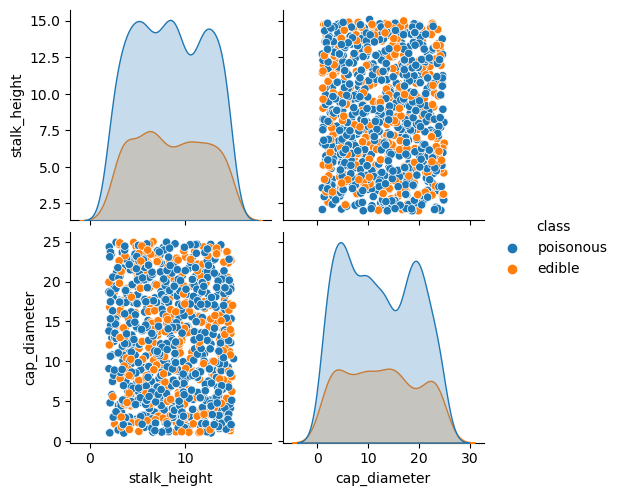

In [22]:
# Pair plot for the first few features and the target variable
sns.pairplot(data, vars=['stalk_height', 'cap_diameter'], hue='class')
plt.show()

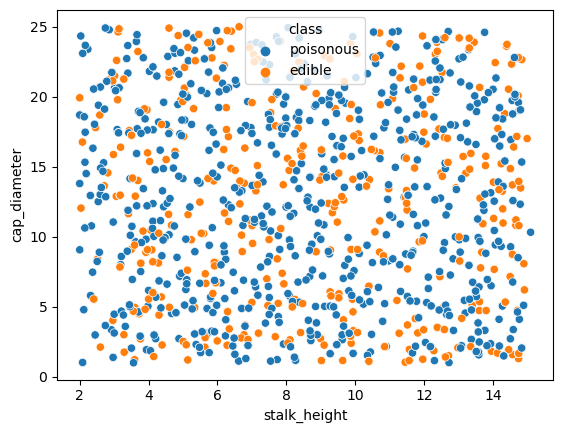

In [23]:
# Scatter plot for numerical features with the target variable
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=data)
plt.show()

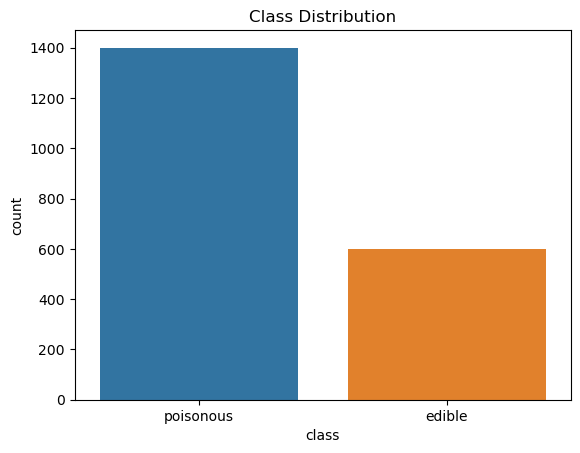

In [25]:
# Plot class distribution
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [34]:
# Initialize the scaler, PCA, and SVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)
svm_classifier = SVC(kernel='linear', random_state=42)

In [35]:
# Create a pipeline with scaling, PCA, and SVM
pipeline = make_pipeline(scaler, pca, svm_classifier)

In [36]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

In [38]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6675
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Encode class labels to numerical values for plotting
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

In [44]:
# Plot PCA-transformed training data
X_train_pca = pipeline.named_steps['pca'].transform(scaler.transform(X_train))
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Principal Component 2')

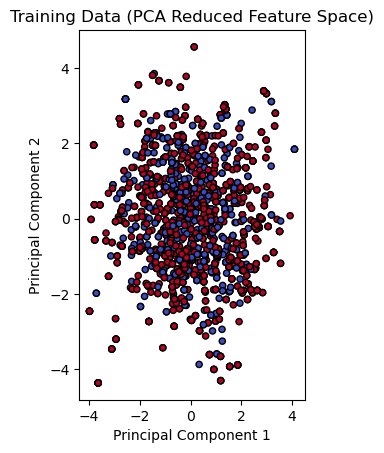

In [45]:
# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Training Data (PCA Reduced Feature Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

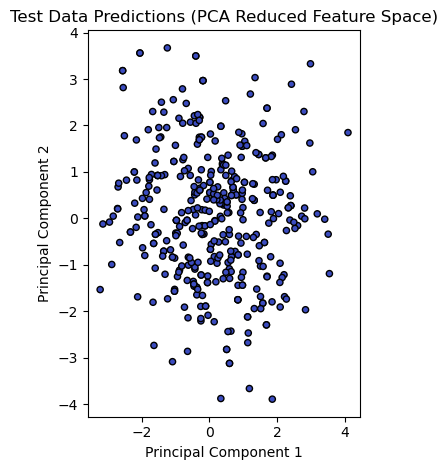

In [46]:
# Plot PCA-transformed test data
X_test_pca = pipeline.named_steps['pca'].transform(scaler.transform(X_test))
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_encoded, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Test Data Predictions (PCA Reduced Feature Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Principal Component 2')

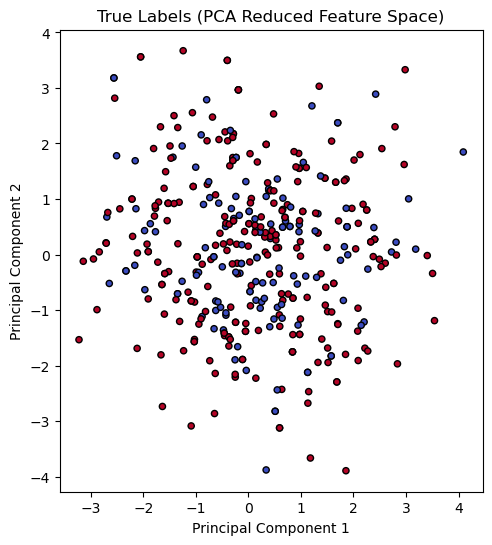

In [47]:
# Plot PCA-transformed test data with true labels
plt.figure(figsize=(12, 6))

# Plot test data with true labels
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap='coolwarm', edgecolor='k', s=20)
plt.title('True Labels (PCA Reduced Feature Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


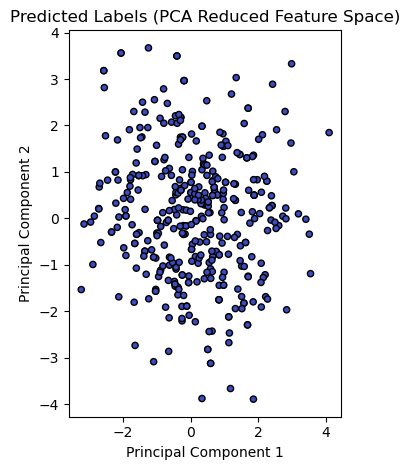

In [48]:
# Plot test data with predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_encoded, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Predicted Labels (PCA Reduced Feature Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

# Smaller parameter grid
param_grid = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']
}


In [53]:
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA(n_components=2)),
                                             ('svc', SVC(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1, 10],
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy')

In [55]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [56]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [57]:
print('Best Parameters:', best_params)
print('Best Cross-Validation Accuracy:', best_score)

Best Parameters: {'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.710625


In [58]:
# Use the best estimator for predictions
best_estimator = grid_search.best_estimator_
y_pred_best = best_estimator.predict(X_test)

In [59]:
# Evaluate the model with best parameters
print('Test Accuracy with Best Parameters:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy with Best Parameters: 0.675
              precision    recall  f1-score   support

      edible       1.00      0.02      0.04       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.68       400
   macro avg       0.84      0.51      0.42       400
weighted avg       0.78      0.68      0.55       400



In [60]:
#We'll compare SVM performance with various kernels and analyze the results.
# Define different SVM models with various kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

In [61]:
for kernel in kernels:
    svm_classifier = make_pipeline(scaler, pca, SVC(kernel=kernel, random_state=42))
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))


Kernel: linear
Accuracy: 0.6675
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Kernel: poly
Accuracy: 0.6675
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinit\anaconda3\Lib\site-packag

Kernel: rbf
Accuracy: 0.6675
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Kernel: sigmoid
Accuracy: 0.5625
              precision    recall  f1-score   support

      edible       0.29      0.21      0.24       133
   poisonous       0.65      0.74      0.69       267

    accuracy                           0.56       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.53      0.56      0.54       400



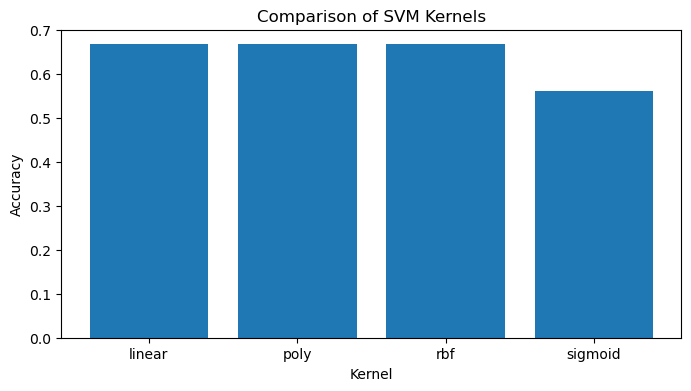

In [62]:
# Visualize the comparison of different kernels
plt.figure(figsize=(8, 4))
plt.bar(results.keys(), results.values())
plt.title('Comparison of SVM Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()